# Plots for Ascenzi, Graber and Rea (2023)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import ns_eos.gap_parametrisation as gp
import ns_eos.equilibrium_comp as ec

## Plotting adjustments

In [2]:
%matplotlib inline

# Set `usetex=False' if you do not have LaTeX installed.
rc("text", usetex=True)
rc("font", family="serif")
mpl.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
width = 6.8
# golden = 1.61803398875
# height = width / golden
height = 5.0

In [5]:
colours = [
    "#d32f2f",
    "#7b1fa2",
    "#303f9f",
    "#0097a7",
    "#689f38",
    "#ffa000",
    "#B8B8B8",
    "#484848",
]
lines = [[], [1, 2], [2, 1], [4, 1], [8, 1], [4, 1, 2, 1]]

## Gap calculation

Defining relevant quantities

In [6]:
# natural constants
c = 2.997925e23  # speed of light in fm/s
hbar = 6.582120e-22  # hbar in MeV s
m_u = 1.036427e-44  # atomic mass unit in MeV s**2/fm**2
m_u_cgs = 1.660539e-24  # atomic mass unit in g
m_mu = 0.113429 * m_u  # muon mass unit in MeV s**2/fm**2
q = 1.199985  # electric charge in (MeV fm)**1/2

# unit conversion factors
fm = 1e-13  # fm to cm
MeV = 1e6 * 1.782662e-33 * (c * fm) ** 2  # MeV to g*cm**2/s**2

# baryon number density and mass energy density in units of 1/fm**3 and g/cm**3
n_b = np.linspace(0.03, 0.6, 500)
rho_b = m_u_cgs * n_b / fm**3

# Fermi wave number to calculate the gaps
k_F = np.arange(0, 3.5, 0.01)

Vectorising the three functions to work with arrays:

In [7]:
gap_singlet_neutrons = np.vectorize(gp.gap_singlet_neutrons, excluded="gap_parameters")
gap_singlet_protons = np.vectorize(gp.gap_singlet_protons, excluded="gap_parameters")
gap_triplet_neutrons = np.vectorize(gp.gap_triplet_neutrons, excluded="gap_parameters")

Creating dataframes for the various gaps for each superfluid

In [8]:
df_gaps_singlet_neutrons = pd.DataFrame(
    {
        "k_F": k_F,
        "AWP2": gap_singlet_neutrons(k_F, gp.neutron_singlet_AWP2),
        "AWP3": gap_singlet_neutrons(k_F, gp.neutron_singlet_AWP3),
        "CCDK": gap_singlet_neutrons(k_F, gp.neutron_singlet_CCDK),
        "CLS": gap_singlet_neutrons(k_F, gp.neutron_singlet_CLS),
        "GIPSF": gap_singlet_neutrons(k_F, gp.neutron_singlet_GIPSF),
        "MSH": gap_singlet_neutrons(k_F, gp.neutron_singlet_MSH),
        "SCLBL": gap_singlet_neutrons(k_F, gp.neutron_singlet_SCLBL),
        "SFB": gap_singlet_neutrons(k_F, gp.neutron_singlet_SFB),
        "WAP": gap_singlet_neutrons(k_F, gp.neutron_singlet_WAP)
    }
)

df_gaps_singlet_neutrons.columns = pd.MultiIndex.from_tuples(
    zip(df_gaps_singlet_neutrons.columns, ["[1/fm]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]"])
)

In [9]:
df_gaps_singlet_neutrons[100:110]

,k_F,AWP2,AWP3,CCDK,CLS,GIPSF,MSH,SCLBL,SFB,WAP
,[1/fm],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV]
100,1.00,1.372300,0.897868,0.095501,1.514828,0.478793,1.403339,0.719913,0.740940,0.678087
101,1.01,1.363044,0.872896,0.074775,1.491645,0.436113,1.378139,0.735036,0.730562,0.658491
102,1.02,1.352758,0.847145,0.056154,1.466446,0.394889,1.351757,0.749975,0.719603,0.638392
103,1.03,1.341460,0.820674,0.039840,1.439091,0.355223,1.324170,0.764711,0.708078,0.617830
104,1.04,1.329171,0.793546,0.026037,1.409431,0.317213,1.295355,0.779225,0.696003,0.596850
105,1.05,1.315910,0.765823,0.014949,1.377306,0.280953,1.265293,0.793497,0.683396,0.575497
106,1.06,1.301701,0.737571,0.006778,1.342555,0.246537,1.233964,0.807504,0.670275,0.553815
107,1.07,1.286565,0.708858,0.001728,1.305008,0.214053,1.201356,0.821225,0.656661,0.531853
108,1.08,1.270529,0.679753,0.000000,1.264497,0.183585,1.167460,0.834637,0.642574,0.509658


In [10]:
df_gaps_singlet_protons = pd.DataFrame(
    {
        "k_F": k_F,
        "AO": gap_singlet_protons(k_F, gp.proton_singlet_AO),
        "BCLL": gap_singlet_protons(k_F, gp.proton_singlet_BCLL),
        "BS": gap_singlet_protons(k_F, gp.proton_singlet_BS),
        "CCDK": gap_singlet_protons(k_F, gp.proton_singlet_CCDK),
        "CCYms": gap_singlet_protons(k_F, gp.proton_singlet_CCYms),
        "CCYps": gap_singlet_protons(k_F, gp.proton_singlet_CCYps),
        "EEHO": gap_singlet_protons(k_F, gp.proton_singlet_EEHO),
        "EEHOr": gap_singlet_protons(k_F, gp.proton_singlet_EEHOr),
        "T": gap_singlet_protons(k_F, gp.proton_singlet_T)
    }
)

df_gaps_singlet_protons.columns = pd.MultiIndex.from_tuples(
    zip(df_gaps_singlet_protons.columns, ["[1/fm]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]"])
)

In [11]:
df_gaps_singlet_protons[100:110]

,k_F,AO,BCLL,BS,CCDK,CCYms,CCYps,EEHO,EEHOr,T
,[1/fm],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV]
100,1.00,0.007056,0.024129,NaN,0.577358,0.114379,NaN,0.293974,0.142857,0.173056
101,1.01,0.004541,0.015551,NaN,0.551295,0.094546,NaN,0.269922,0.118070,0.159135
102,1.02,0.002568,0.008798,NaN,0.524987,0.076188,NaN,0.246324,0.095138,0.145471
103,1.03,0.001148,0.003928,NaN,0.498499,0.059456,NaN,0.223271,0.074243,0.132111
104,1.04,0.000288,0.000985,NaN,0.471899,0.044497,NaN,0.200858,0.055567,0.119107
105,1.05,0.000000,NaN,NaN,0.445256,0.031459,NaN,0.179177,0.039290,0.106508
106,1.06,NaN,NaN,NaN,0.418643,0.020485,NaN,0.158321,0.025589,0.094364
107,1.07,NaN,NaN,NaN,0.392132,0.011717,NaN,0.138382,0.014640,0.082726
108,1.08,NaN,NaN,NaN,0.365799,0.005292,NaN,0.119452,0.006614,0.071643


In [12]:
df_gaps_triplet_neutrons = pd.DataFrame(
    {
        "k_F": k_F,
        "AO": gap_triplet_neutrons(k_F, gp.neutron_triplet_AO),
        "BEEHS": gap_triplet_neutrons(k_F, gp.neutron_triplet_BEEHS),
#         "EEHO": gap_triplet_neutrons(k_F, gp.neutron_triplet_EEHO),
#         "EEHOr": gap_triplet_neutrons(k_F, gp.neutron_triplet_EEHOr),
#         "SYHHP": gap_triplet_neutrons(k_F, gp.neutron_triplet_SYHHP),
#         "T": gap_triplet_neutrons(k_F, gp.neutron_triplet_T),
        "TTav": gap_triplet_neutrons(k_F, gp.neutron_triplet_TTav),
        "TToa": gap_triplet_neutrons(k_F, gp.neutron_triplet_TToa),
    }
)

df_gaps_triplet_neutrons.columns = pd.MultiIndex.from_tuples(
    zip(df_gaps_triplet_neutrons.columns, ["[1/fm]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]"])
)

In [13]:
df_gaps_triplet_neutrons[150:160]

,k_F,AO,BEEHS,TTav,TToa
,[1/fm],[MeV],[MeV],[MeV],[MeV]
150,1.50,0.262136,0.159297,0.253870,0.241528
151,1.51,0.274907,0.163043,0.261682,0.249735
152,1.52,0.287614,0.166735,0.269345,0.257858
153,1.53,0.300231,0.170372,0.276848,0.265888
154,1.54,0.312736,0.173952,0.284182,0.273817
155,1.55,0.325107,0.177475,0.291339,0.281634
156,1.56,0.337326,0.180939,0.298309,0.289332
157,1.57,0.349371,0.184344,0.305086,0.296904
158,1.58,0.361226,0.187688,0.311661,0.304341


### Gaps as function of Fermi number

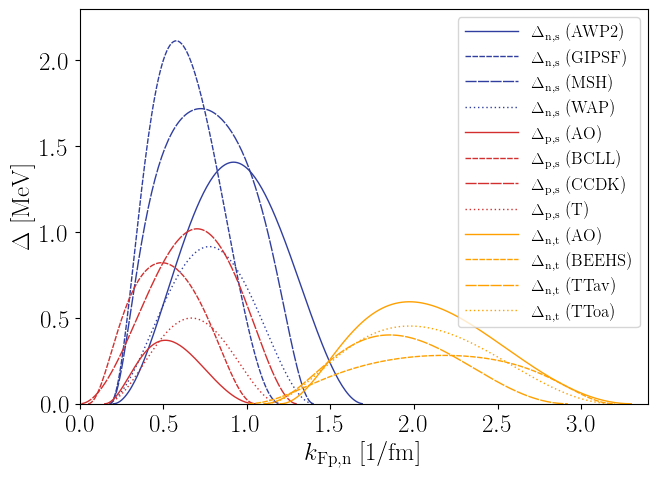

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(width, height)

ax.plot(
    df_gaps_singlet_neutrons["k_F"],
    df_gaps_singlet_neutrons["AWP2"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (AWP2)",
    dashes=lines[0],
)
ax.plot(
    df_gaps_singlet_neutrons["k_F"],
    df_gaps_singlet_neutrons["GIPSF"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (GIPSF)",
    dashes=lines[3],
)
ax.plot(
    df_gaps_singlet_neutrons["k_F"],
    df_gaps_singlet_neutrons["MSH"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (MSH)",
    dashes=lines[4],
)
ax.plot(
    df_gaps_singlet_neutrons["k_F"],
    df_gaps_singlet_neutrons["WAP"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (WAP)",
    dashes=lines[1],
)

ax.plot(
    df_gaps_singlet_protons["k_F"],
    df_gaps_singlet_protons["AO"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (AO)",
    dashes=lines[0],
)
ax.plot(
    df_gaps_singlet_protons["k_F"],
    df_gaps_singlet_protons["BCLL"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (BCLL)",
    dashes=lines[3],
)
ax.plot(
    df_gaps_singlet_protons["k_F"],
    df_gaps_singlet_protons["CCDK"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (CCDK)",
    dashes=lines[4],
)
ax.plot(
    df_gaps_singlet_protons["k_F"],
    df_gaps_singlet_protons["T"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (T)",
    dashes=lines[1],
)

ax.plot(
    df_gaps_triplet_neutrons["k_F"],
    df_gaps_triplet_neutrons["AO"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (AO)",
    dashes=lines[0],
)
ax.plot(
    df_gaps_triplet_neutrons["k_F"],
    df_gaps_triplet_neutrons["BEEHS"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (BEEHS)",
    dashes=lines[3],
)
ax.plot(
    df_gaps_triplet_neutrons["k_F"],
    df_gaps_triplet_neutrons["TTav"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (TTav)",
    dashes=lines[4],
)
ax.plot(
    df_gaps_triplet_neutrons["k_F"],
    df_gaps_triplet_neutrons["TToa"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (TToa)",
    dashes=lines[1],
)

ax.set_xlim(0.0, 3.4)
ax.set_ylim(0.0, 2.3)
ax.set_xlabel(r"$k_{\rm F p,n}$ [${\rm 1/fm}$]")
ax.set_ylabel(r"$\Delta$ [${\rm MeV}$]")

plt.legend(loc=1, handlelength=3.2, fontsize=12)

plt.tight_layout()

plt.savefig("../../../Dropbox/work/Paper_Writing/energy_gaps.pdf", dpi=1000, bbox_inches="tight")
plt.show()

### Gaps as function of density

### Temperature as function of density

In [15]:
eos_NRAPR = ec.EquationOfState(
    t0=-2719.70,
    t1=417.64,
    t2=-66.687,
    t3=15042.00,
    x0=0.16154,
    x1=-0.047986,
    x2=0.027170,
    x3=0.13611,
    sigma=0.14416,
    W0=41.958,
)

n_n_NRAPR = eos_NRAPR.n_n(n_b)
n_p_NRAPR = eos_NRAPR.n_p(n_b)
k_n_NRAPR = eos_NRAPR.k_F_n(n_b)
k_p_NRAPR = eos_NRAPR.k_F_p(n_b)

In [16]:
df_gaps_singlet_neutrons_NRAPR = pd.DataFrame(
    {
        "k_F": k_n_NRAPR,
        "AWP2": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_AWP2),
        "AWP3": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_AWP3),
        "CCDK": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_CCDK),
        "CLS": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_CLS),
        "GIPSF": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_GIPSF),
        "MSH": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_MSH),
        "SCLBL": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_SCLBL),
        "SFB": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_SFB),
        "WAP": gap_singlet_neutrons(k_n_NRAPR, gp.neutron_singlet_WAP)
    }
)

df_gaps_singlet_neutrons_NRAPR.columns = pd.MultiIndex.from_tuples(
    zip(df_gaps_singlet_neutrons_NRAPR.columns, ["[1/fm]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]"])
)

In [17]:
df_gaps_singlet_neutrons_NRAPR[0:10]

,k_F,AWP2,AWP3,CCDK,CLS,GIPSF,MSH,SCLBL,SFB,WAP
,[1/fm],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV]
0,0.957648,1.399726,0.993708,0.202001,1.593539,0.673292,1.497568,0.654250,0.778123,0.754572
1,0.969489,1.394011,0.968658,0.169656,1.574431,0.616937,1.473196,0.672829,0.768860,0.734340
2,0.981036,1.386967,0.942882,0.139868,1.553722,0.563367,1.447977,0.690796,0.758970,0.713718
3,0.992305,1.378711,0.916516,0.112754,1.531378,0.512562,1.421942,0.708163,0.748519,0.692795
4,1.003314,1.369348,0.889682,0.088412,1.507360,0.464495,1.395118,0.724944,0.737566,0.671651
5,1.014075,1.358975,0.862492,0.066921,1.481627,0.419131,1.367532,0.741147,0.726166,0.650359
6,1.024603,1.347683,0.835047,0.048347,1.454132,0.376433,1.339211,0.756784,0.714368,0.628983
7,1.034908,1.335551,0.807438,0.032740,1.424832,0.336355,1.310183,0.771864,0.702219,0.607583
8,1.045002,1.322658,0.779748,0.020139,1.393679,0.298850,1.280474,0.786396,0.689762,0.586213


In [18]:
df_gaps_singlet_protons_NRAPR = pd.DataFrame(
    {
        "k_p_NRAPR": k_n_NRAPR,
        "AO": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_AO),
        "BCLL": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_BCLL),
        "BS": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_BS),
        "CCDK": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_CCDK),
        "CCYms": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_CCYms),
        "CCYps": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_CCYps),
        "EEHO": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_EEHO),
        "EEHOr": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_EEHOr),
        "T": gap_singlet_protons(k_p_NRAPR, gp.proton_singlet_T)
    }
)

df_gaps_singlet_protons_NRAPR.columns = pd.MultiIndex.from_tuples(
    zip(df_gaps_singlet_protons_NRAPR.columns, ["[1/fm]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]"])
)

In [19]:
df_gaps_triplet_neutrons_NRAPR = pd.DataFrame(
    {
        "k_n_NRAPR": k_n_NRAPR,
        "AO": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_AO),
        "BEEHS": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_BEEHS),
#         "EEHO": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_EEHO),
#         "EEHOr": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_EEHOr),
#         "SYHHP": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_SYHHP),
#         "T": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_T),
        "TTav": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_TTav),
        "TToa": gap_triplet_neutrons(k_n_NRAPR, gp.neutron_triplet_TToa),
    }
)

df_gaps_triplet_neutrons_NRAPR.columns = pd.MultiIndex.from_tuples(
    zip(df_gaps_triplet_neutrons_NRAPR.columns, ["[1/fm]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]", "[MeV]"])
)

In [20]:
k_B = 8.617330 * 1e-11  # [MeV/K]
c_singlet = 0.567
c_triplet = 0.118

df_Tc_singlet_neutrons = c_singlet * df_gaps_singlet_neutrons_NRAPR / k_B
df_Tc_singlet_protons = c_singlet * df_gaps_singlet_protons_NRAPR / k_B
df_Tc_triplet_neutrons = c_triplet * df_gaps_triplet_neutrons_NRAPR / k_B

In [21]:
df_Tc_singlet_neutrons.head()

,k_F,AWP2,AWP3,CCDK,CLS,GIPSF,MSH,SCLBL,SFB,WAP
,[1/fm],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV]
0,6.301100e+09,9.209868e+09,6.538365e+09,1.329118e+09,1.048511e+10,4.430106e+09,9.853642e+09,4.304809e+09,5.119863e+09,4.964903e+09
1,6.379009e+09,9.172264e+09,6.373541e+09,1.116299e+09,1.035938e+10,4.059300e+09,9.693282e+09,4.427054e+09,5.058915e+09,4.831785e+09
2,6.454983e+09,9.125919e+09,6.203941e+09,9.203015e+08,1.022312e+10,3.706820e+09,9.527350e+09,4.545273e+09,4.993845e+09,4.696098e+09
3,6.529135e+09,9.071593e+09,6.030458e+09,7.418980e+08,1.007611e+10,3.372536e+09,9.356043e+09,4.659549e+09,4.925079e+09,4.558430e+09
4,6.601568e+09,9.009987e+09,5.853900e+09,5.817302e+08,9.918076e+09,3.056265e+09,9.179545e+09,4.769958e+09,4.853011e+09,4.419308e+09


In [22]:
df_Tc_singlet_protons.head()

,k_p_NRAPR,AO,BCLL,BS,CCDK,CCYms,CCYps,EEHO,EEHOr,T
,[1/fm],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV],[MeV]
0,6.301100e+09,2.732483e+08,2.544036e+09,1.429068e+09,1.514752e+09,1.293440e+09,1.323522e+09,1.639437e+09,1.745341e+09,1.658002e+08
1,6.379009e+09,3.193768e+08,2.666258e+09,1.500832e+09,1.588196e+09,1.357050e+09,1.387845e+09,1.717283e+09,1.830250e+09,1.950031e+08
2,6.454983e+09,3.674482e+08,2.785269e+09,1.572799e+09,1.661738e+09,1.420784e+09,1.452195e+09,1.794982e+09,1.915250e+09,2.258040e+08
3,6.529135e+09,4.171738e+08,2.900981e+09,1.644904e+09,1.735323e+09,1.484592e+09,1.516514e+09,1.872468e+09,2.000270e+09,2.580667e+08
4,6.601568e+09,4.682856e+08,3.013335e+09,1.717080e+09,1.808899e+09,1.548425e+09,1.580747e+09,1.949679e+09,2.085245e+09,2.916640e+08


In [23]:
df_Tc_triplet_neutrons.head()

,k_n_NRAPR,AO,BEEHS,TTav,TToa
,[1/fm],[MeV],[MeV],[MeV],[MeV]
0,1.311340e+09,NaN,NaN,NaN,NaN
1,1.327554e+09,NaN,NaN,NaN,NaN
2,1.343365e+09,NaN,NaN,NaN,NaN
3,1.358797e+09,NaN,NaN,NaN,NaN
4,1.373871e+09,NaN,16083.185484,NaN,NaN


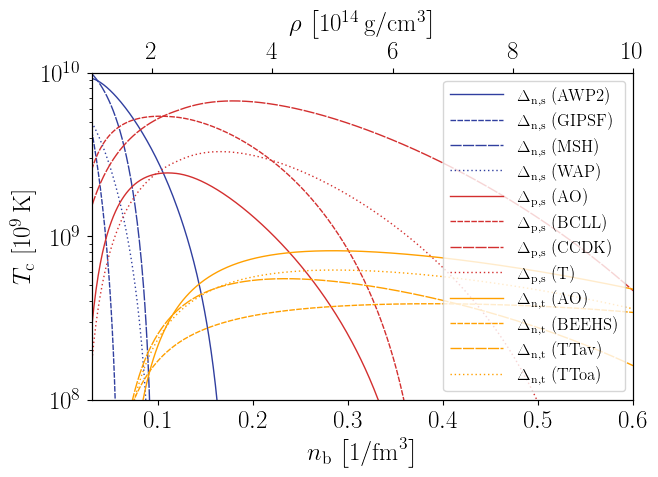

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(width, height)

ax.plot(
    n_b,
    df_Tc_singlet_neutrons["AWP2"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (AWP2)",
    dashes=lines[0],
)
ax.plot(
    n_b,
    df_Tc_singlet_neutrons["GIPSF"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (GIPSF)",
    dashes=lines[3],
)
ax.plot(
    n_b,
    df_Tc_singlet_neutrons["MSH"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (MSH)",
    dashes=lines[4],
)
ax.plot(
    n_b,
    df_Tc_singlet_neutrons["WAP"],
    color=colours[2],
    linewidth=1,
    label=r"$\Delta_{\rm n, s}$ (WAP)",
    dashes=lines[1],
)

ax.plot(
    n_b,
    df_Tc_singlet_protons["AO"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (AO)",
    dashes=lines[0],
)
ax.plot(
    n_b,
    df_Tc_singlet_protons["BCLL"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (BCLL)",
    dashes=lines[3],
)
ax.plot(
    n_b,
    df_Tc_singlet_protons["CCDK"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (CCDK)",
    dashes=lines[4],
)
ax.plot(
    n_b,
    df_Tc_singlet_protons["T"],
    color=colours[0],
    linewidth=1,
    label=r"$\Delta_{\rm p, s}$ (T)",
    dashes=lines[1],
)

ax.plot(
    n_b,
    df_Tc_triplet_neutrons["AO"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (AO)",
    dashes=lines[0],
)
ax.plot(
    n_b,
    df_Tc_triplet_neutrons["BEEHS"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (BEEHS)",
    dashes=lines[3],
)
ax.plot(
    n_b,
    df_Tc_triplet_neutrons["TTav"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (TTav)",
    dashes=lines[4],
)
ax.plot(
    n_b,
    df_Tc_triplet_neutrons["TToa"],
    color=colours[5],
    linewidth=1,
    label=r"$\Delta_{\rm n, t}$ (TToa)",
    dashes=lines[1],
)

ax.set_xlim(0.03, 0.6)
upper_ylimit = 10
ax.set_ylim(1e8, 1e10)
ax.set_xlabel(r"$n_{\rm b}$ $\left[ 1 / {\rm fm}^{3} \right]$")
ax.set_ylabel(r"$T_{\rm c}$ [$10^9 \, {\rm K}$]")

plt.legend(loc=1, handlelength=3.2, fontsize=12)

secax = ax.twiny()
secax.plot(n_b, np.ones(len(rho_b)) * upper_ylimit)
secax.set_xlabel(
    r"$\rho$ $\left[ 10^{14} \, {\rm g} / {\rm cm}^{3} \right]$", labelpad=8
)
secax.set_xlim(1.0, 10.0)

ax.semilogy()

plt.tight_layout()

plt.savefig("../../../Dropbox/work/Paper_Writing/Tc_plot.pdf", dpi=1000, bbox_inches="tight")
plt.show()